# 可视化泰坦尼克灾难数据

## 步骤1 导入必要的库

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## 步骤2 从以下地址导入数据

In [2]:
path = '../../exercise_data/train.csv'

## 将数据框命名为titanic

字段名称 | 解释说明
--- | ---
PassengerId | 乘客ID
Survived | 是否幸存
Pclass | 乘客所在的舱位
Name | 乘客姓名
Sex	| 乘客性别
SibSp | 有多少亲属/配偶一起乘船
Parch | 有多父母/孩子一起乘船
Ticket | 船票号
Fare | 费用
Carbin | 船舱包厢号
Embarked | 是否登船

In [3]:
titanic = pd.read_csv(path)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 步骤4 将PassengerId设置为索引

In [4]:
titanic.set_index(titanic.PassengerId.name).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 步骤5 绘制一个展示男女乘客比例的扇形图

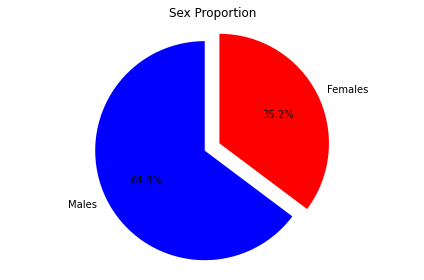

In [5]:
males = (titanic.Sex == 'male').sum()
females = (titanic.Sex == 'female').sum()

proportions = [males, females]

# 创建一个扇形图
plt.pie(proportions, 
       labels=['Males', 'Females'],
       shadow=False,
       colors=['blue', 'red'],
       explode=(0.15, 0),
       startangle=90,
       autopct='%1.1f%%')
# 将横轴纵轴的定标系数设成相同值，使得图形更圆
plt.axis('equal')
#设置标题
plt.title('Sex Proportion')
plt.tight_layout()
plt.show()

## 步骤6 绘制一个展示船票(Fare), 与乘客年龄和性别的散点图

(-5.0, 85.0)

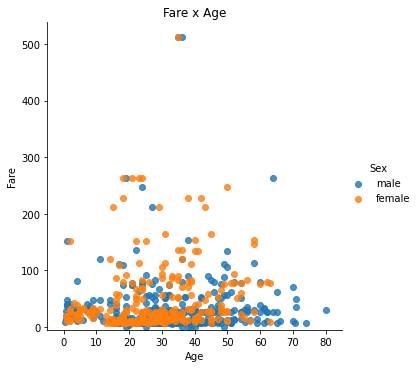

In [6]:
# 创建一个散点图
lm = sns.lmplot(x = 'Age', y='Fare', data=titanic, hue='Sex', fit_reg=False)

# 设置标题
lm.set(title = 'Fare x Age')

axes = lm.axes
axes[0, 0].set_ylim(-5,)
axes[0, 0].set_xlim(-5, 85)

## 步骤7 有多少人生还？

In [7]:
titanic.Survived.sum()

342

## 步骤8 绘制一个展示船票价格的直方图

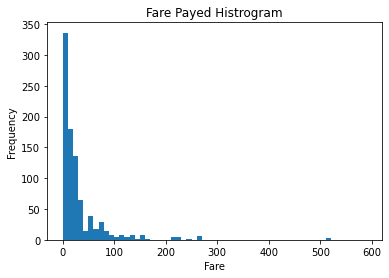

In [8]:
# 将数据按照船票的价格从高到低排序
df = titanic.Fare.sort_values(ascending=False)

binsVal = np.arange(0, 600, 10)

plt.hist(df, bins=binsVal)

plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')

plt.show()